In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
%matplotlib inline

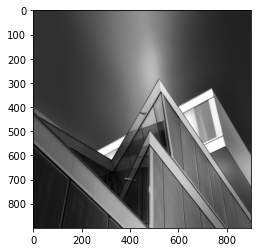

In [2]:
path_rgb = 'rgb.jpg'
path_greyscale = 'greyscale.jpg'
img = mpimg.imread(path_greyscale)
plt.imshow(img)

In [3]:
print (img.shape)
print (np.array_equal(img[:, :, 0], img[:, :, 1]))
print (np.array_equal(img[:, :, 1], img[:, :, 2]))

(900, 900, 3)
True
True


In [6]:
img

array([[[52, 52, 52],
        [50, 50, 50],
        [49, 49, 49],
        ...,
        [34, 34, 34],
        [34, 34, 34],
        [33, 33, 33]],

       [[51, 51, 51],
        [50, 50, 50],
        [50, 50, 50],
        ...,
        [35, 35, 35],
        [34, 34, 34],
        [34, 34, 34]],

       [[51, 51, 51],
        [50, 50, 50],
        [50, 50, 50],
        ...,
        [35, 35, 35],
        [34, 34, 34],
        [34, 34, 34]],

       ...,

       [[27, 27, 27],
        [29, 29, 29],
        [28, 28, 28],
        ...,
        [81, 81, 81],
        [84, 84, 84],
        [86, 86, 86]],

       [[28, 28, 28],
        [28, 28, 28],
        [27, 27, 27],
        ...,
        [85, 85, 85],
        [85, 85, 85],
        [88, 88, 88]],

       [[32, 32, 32],
        [27, 27, 27],
        [26, 26, 26],
        ...,
        [91, 91, 91],
        [87, 87, 87],
        [88, 88, 88]]], dtype=uint8)

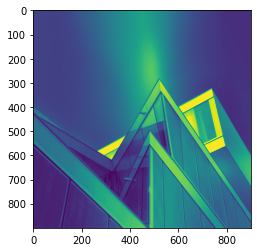

In [4]:
img = img[:, :, 0]
plt.imshow(img)

In [5]:
img

array([[52, 50, 49, ..., 34, 34, 33],
       [51, 50, 50, ..., 35, 34, 34],
       [51, 50, 50, ..., 35, 34, 34],
       ...,
       [27, 29, 28, ..., 81, 84, 86],
       [28, 28, 27, ..., 85, 85, 88],
       [32, 27, 26, ..., 91, 87, 88]], dtype=uint8)

In [6]:
padded_array = np.pad(img, (1, 1), 'constant')
kernel = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
output_array = np.zeros(img.shape)

for i in range(padded_array.shape[0]-2):
    for j in range(padded_array.shape[1]-2):
        temp_array = padded_array[i:i+3, j:j+3]
        output_array[i, j] = np.sum(temp_array*kernel)

It’s the same! Why? Because of the kernel we chose. For any given patch in the image, our convolution is just outputting 1 * the middle element of the patch. Every other element-to-element multiplication becomes 0 due to the kernel. For this reason, we call this kernel the identity kernel.

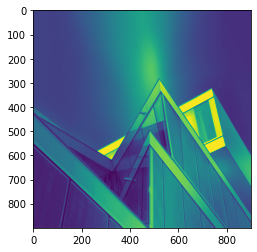

In [7]:
plt.imshow(output_array)

**Standard Convolution**
First, we’ll define a function to convolve a 2-D kernel on an image. Since we’re calculating sums, our output values can be greater than 255 or less than 0. We might want to squash those values to 255 and 0, respectively, so we’ll write a function to do that. 

There are better ways to handle this phenomenon (such as biasing the output value by a certain amount), but this works for now.


In [8]:
def squash_pixel_value(value):
    if value < 0:
        return 0
    elif value < 255:
        return value
    else:
        return 255

In [9]:
def conv_2d_kernel(image_array_2d, kernel, squash_pixels = True):
    padded_array = np.pad(image_array_2d, (1, 1), 'constant')
    
    kernel_width = kernel.shape[0]
    kernel_height = kernel.shape[1]
    
    transformed_array = np.zeros(image_array_2d.shape)
 
    for i in range(padded_array.shape[0] - kernel_width + 1):
        for j in range(padded_array.shape[1] - kernel_height + 1):
            temp_array = padded_array[i:i+kernel_width, j:j+kernel_height]
            #print temp_array.shape
            if squash_pixels:
                transformed_array[i, j] = squash_pixel_value(np.sum(temp_array*kernel))
            else:
                transformed_array[i, j] = np.sum(temp_array*kernel)
    return transformed_array

**Edge Detection**

In [10]:
edge_kernel_1 = np.array([[1, 0, -1],
                          [0, 0, 0],
                          [-1, 0, 1]])

edge_kernel_2 = np.array([[0, 1, 0],
                          [1, -4, 1],
                          [0, 1, 0]])

edge_kernel_3 = np.array([[-1, -1, -1],
                          [-1, 8, -1],
                          [-1, -1, -1]])

transf_edge1 = conv_2d_kernel(img, kernel = edge_kernel_1, squash_pixels = True)
transf_edge2 = conv_2d_kernel(img, kernel = edge_kernel_2, squash_pixels = True)
transf_edge3 = conv_2d_kernel(img, kernel = edge_kernel_3, squash_pixels = True)

(-0.5, 899.5, 899.5, -0.5)

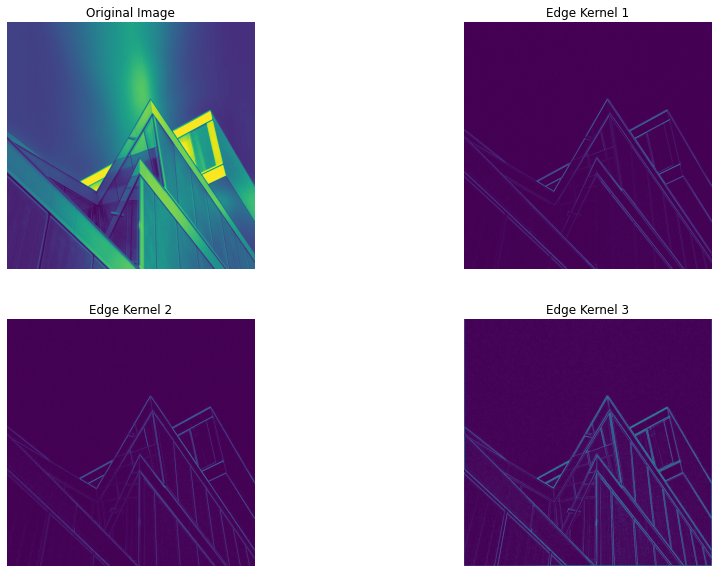

In [11]:
f, ax_array = plt.subplots(2, 2)
f.set_figheight(10)
f.set_figwidth(15)
ax_array[0, 0].imshow(img)
ax_array[0, 0].set_title('Original Image')
ax_array[0, 0].axis('off')
ax_array[0, 1].imshow(transf_edge1)
ax_array[0, 1].set_title('Edge Kernel 1')
ax_array[0, 1].axis('off')
ax_array[1, 0].imshow(transf_edge2)
ax_array[1, 0].set_title('Edge Kernel 2')
ax_array[1, 0].axis('off')
ax_array[1, 1].imshow(transf_edge3)
ax_array[1, 1].set_title('Edge Kernel 3')
ax_array[1, 1].axis('off')

**Sharpening Kernels**

In [12]:
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

unsharp_kernel = np.array([[1, 4, 6, 4, 1],
                           [4, 16, 24, 16, 4],
                           [6, 24, -476, 24, 6],
                           [4, 16, 24, 16, 4],
                           [1, 4, 6, 4, 1]]) / -256

transf_sharpen = conv_2d_kernel(img, kernel = sharpen_kernel, squash_pixels = True)
transf_unsharp = conv_2d_kernel(img, kernel = unsharp_kernel, squash_pixels = True)

(-0.5, 899.5, 899.5, -0.5)

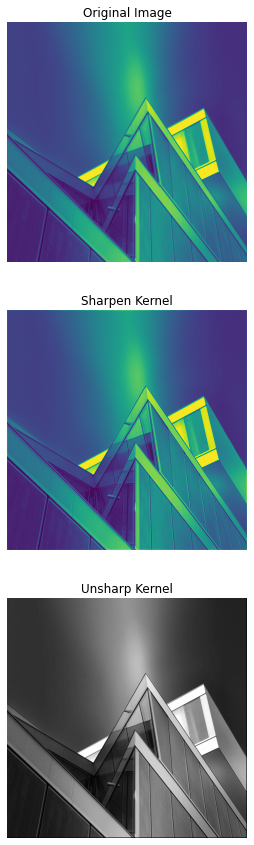

In [13]:
f, ax_array = plt.subplots(3, 1)
f.set_figheight(15)
f.set_figwidth(12)
ax_array[0].imshow(img)
ax_array[0].set_title('Original Image')
ax_array[0].axis('off')
ax_array[1].imshow(transf_sharpen)
ax_array[1].set_title('Sharpen Kernel')
ax_array[1].axis('off')
ax_array[2].imshow(transf_unsharp, cmap = plt.get_cmap('gray'))
ax_array[2].set_title('Unsharp Kernel')
ax_array[2].axis('off')

**Blurring Kernels**

In [17]:
blur_box_kernel = np.ones((3, 3)) / 9
blur_gaussian_kernel = np.array([[1,2,1],
                                 [2,4,2],
                                 [1,2,1]]) / 16

transf_blur_box = conv_2d_kernel(img, kernel = blur_box_kernel, squash_pixels = True)
transf_blur_gaussian = conv_2d_kernel(img, kernel = blur_gaussian_kernel, squash_pixels = True)


(-0.5, 899.5, 899.5, -0.5)

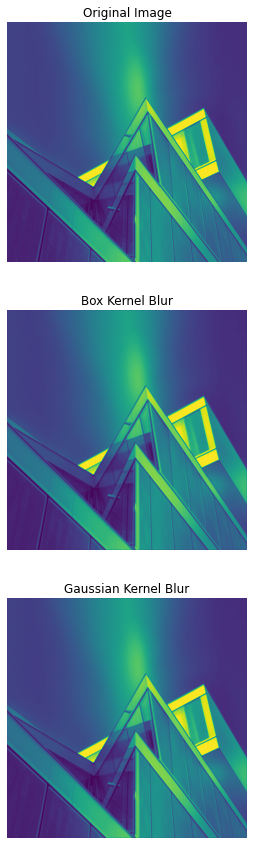

In [18]:
f, ax_array = plt.subplots(3, 1)
f.set_figheight(15)
f.set_figwidth(12)

ax_array[0].imshow(img)
ax_array[0].set_title('Original Image')
ax_array[0].axis('off')
ax_array[1].imshow(transf_blur_box)
ax_array[1].set_title('Box Kernel Blur')
ax_array[1].axis('off')
ax_array[2].imshow(transf_blur_gaussian)
ax_array[2].set_title('Gaussian Kernel Blur')
ax_array[2].axis('off')

Okay. So we’ve got the convolution math and application down. Since we are going to eventually build a convolutional neural net using Tensorflow, we should really understand Tensorflow’s 2-D convolution function, `nn.conv2d` So how does it work?
